In [1]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Correlation between Fuel Type and Asthma Deaths by County"
NOTEBOOK_ID   = "1KHw8VytDaierq4eCypSV4rx-8UorB8Mh"
VERSION = "FA20.12.6.2020"

This Project is going to correlate Vehicle and Health data from 9 counties that make up the Bay Area. I obtained data files from the CA.gov open data portal and found "Asthma Deaths by County" and "Vehicle Fuel Type Count by Zip Code". A heavy task will involve normalizing the zipcoded data into organized data frame for the counties that host the multiple zip codes in their area. From there I will be able to connect whether the fuel type (Hybrid, Elec, Gas) has an affect on the presence of Asthma deaths and create a visualization based on most K-Means Clustering

In [27]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:30px; max-width:800px; font-family:Times, serif;">
 Asthma Deaths to Fuel Type K-Means Clustering
    
<video width="600" controls>
  <source src="https://drive.google.com/uc?export=download&id=12Yx3AyvYmQZ8SBghdPOWDyT16rBIxhYD"
  type="video/mp4">
</video>
</div>

In [3]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Data Acquisition, Selection, Cleaning
Introduce the data here as well as any technical overview that's important that wasn't given in the introduction


In [4]:
AlamedaCounty = [94502, 94505, 94514, 94536, 94538, 94539, 94541,94542, 94544,94545,94546,94550,94551,94552,94555, 94560,94566,94568,94577,94578,94579,94580,94586,94587, 94588,94601, 94602, 94603,94605,94606, 94607,94608, 94609,94610,94611,94612,94615,94617,94618,94619,94621, 94702,94703,94704,94705,94706,94707,94708,94709, 94710,95377,95391]
ContraCostaCounty = [94506,94507,94507,94511,94513,94514,94516,94517,94518,94519,94520,94521,94522,94523,94524,94525,94526,94527,94528,94530,94531,94547,94548,94549,94553,94556,94561,94562,94564,94565,94569,94570,94572,94575,94583,94595,94596,94597,94598,94801,94802,94803,94804,94805,94806,94807,94808,94820,94850]
MarinCounty = [94901,94903,94904,94912,94913,94914,94915,94920,94924,94925,94930,94933,94937,94938,94939,94940,94941,94942,94925,94946,94947,94948,94949,94950,94956,94957,94960,94963,94964,94965,94966,94970,94971,94973,94973,94974,94976,94977,94978,94979]
NapaCounty = [94503,94508,94515,94558,94559,94562,94567,94573,94574,94576,94581,94599]
SanFranciscoCounty = [94101,94102,94103,94104,94105,94106,94107,94108,94109,94110,94111,94112,94114,94115,94116,94117,94118,94119,94120,94121,94123,94124,94125,94126,94127,94129,94130,94131,94132,94133,94134,94140,94141,94142,94146,94147,94157,94159,94164,94165,94166,94167,94168,94169,94170,94172,94188]
SanMateoCounty = [94002,94003,94005,94010,94011,94012,94014,94015,94016,94017,94018,94020,94021,94025,94026,94027,94028,94029,94030,94031,94037,94038,94044,94045,94059,94060,94061,94062,94063,94064,94065,94066,94067,94070,94071,94074,94080,94083,94096,94098,94099,94128,94307,94308,94401,94402,94403,94404,94405,94406,94407,94408,94409]
SantaClaraCounty = [94022,94023,94024,94035,94039,94040,94041,94042,94043,94085,94086,94087,94088,94089,94090,94301,94302,94303,94304,94305,94306,94309,94310,95002,95008,95009,95011,95013,95014,95014,95015,95020,95021,95026,95030,95031,95032,95035,95036,95037,95038,94042,95044,95046,95050,95051,95052,95054,95055,95056,95070,95071,95101,95102,95103,95106,95108,95109,95110,95111,95112,95113,95114,95115,95116,95117,95118,95119,95120,95121,95122,95123,95124,95125,95126,95127,95128,95129,95130,95131,95132,95133,95134,95135,95136,95137,95138,94139,95140,95141,95142,95148,95150,95151,95152,95153,95154,95155,95156,95157,95158,95159,95160,95151,95164,95170,95171,95172,95173]
SolanoCounty = [94510,94512,94533,94534,94535,94571,94585,94589,94590,94591,94592,95620,95625,95687,95688,95696,]
SonomaCounty = [94922,94923,94927,94928,94931,94951,94952,94953,94954,94955,94972,94975,94999,95401,95402,95403,95404,95405,95406,95407,95408,95409,95412,95416,95419,95421,95425,95430,95431,95436,95439,95441,95442,95444,95446,95448,95450,95452,95462,95471,95472,95473,95476,95480,95486,95487,95492,95497]
AllZips = AlamedaCounty + ContraCostaCounty + MarinCounty + NapaCounty + SanFranciscoCounty + SanMateoCounty + SantaClaraCounty + SolanoCounty + SonomaCounty
print(len(AllZips))

#zipcode data: #http://www.ciclt.net/sn/clt/capitolimpact/gw_state.aspx?state=ca&stfips=&stname=california

426


In [7]:
BayCounties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

def install_data1():
  Asthma = 'https://drive.google.com/uc?export=download&id=1Gq2g5FqSx7_-S6v6p_F12IVnqxCwb6lu'
  df1 = pd.read_csv(Asthma)
  return df1
def install_data2():
  Veh = 'https://drive.google.com/uc?export=download&id=1YFslPN7VAvn5KVTmO53b4hsDhOd1QZC4'
  df2  = pd.read_csv(Veh)
  df2.rename(columns = {'Zip Code':'ZipCode'},inplace=True)
  df2 = df2[df2.ZipCode != 'Other']
  df2 = df2[df2.ZipCode != 'OOS']
  df2_years = df2[df2.ZipCode.isin(AllZips)] 
  df2_years.reset_index(drop=True,inplace=True) 
  return df2_years

def clean_data(df):
  df.columns.str.strip()
  df.replace(' ',np.nan)
  return df

def combine_data(df1,df2):  #combine 2 dataframes into 1
  df2['COUNTY'] = df1['COUNTY']
  df2['Number of Deaths'] = df1['NUMBER OF DEATHS']
  return df2

In [8]:
AsthmaData = install_data1()
#combine_data(clean_data(install_data1()),clean_data(install_data2()))
OneFrame = combine_data(clean_data(install_data1()),clean_data(install_data2()))

In [9]:
def CountyMapper(df):   #map the county to the given zipcode 
  countyname = []
  for zip in df['ZipCode']:
    if zip in SanMateoCounty:
      countyname.append('San Mateo')
    elif zip in ContraCostaCounty:
      countyname.append('Contra Costa')
    elif zip in SolanoCounty:
      countyname.append('Solano')
    elif zip in AlamedaCounty:
      countyname.append('Alameda')
    elif zip in MarinCounty:
      countyname.append('Marin')
    elif zip in NapaCounty:
      countyname.append('Napa')
    elif zip in SantaClaraCounty:
      countyname.append('Santa Clara')
    elif zip in SonomaCounty:
      countyname.append('Sonoma')
    elif zip in SanFranciscoCounty:
      countyname.append('San Francisco')
    else:
      pass
  df['CountyZipped'] = countyname
  return df
  
  

def CarCounter(df): #sums up vehicles according to the county they are in
  SanMateoVeh = 0
  AlamedaVeh = 0
  ContraCostaVeh = 0 
  MarinVeh = 0
  NapaVeh = 0
  SonomaVeh = 0 
  SolanoVeh = 0
  SanFranciscoVeh = 0 
  SantaClaraVeh = 0


  for index,row in df.iterrows():
    if row['CountyZipped'] == 'San Mateo':
      SanMateoVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Contra Costa':
      ContraCostaVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Solano':
      SolanoVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Alameda':
      AlamedaVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Marin':
      MarinVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Napa':
      NapaVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Santa Clara':
      SantaClaraVeh += row['Vehicles']
    elif row['CountyZipped'] == 'Sonoma':
      SonomaVeh += row['Vehicles']
    elif row['CountyZipped'] == 'San Francisco':
      SanFranciscoVeh += row['Vehicles']

  CarCountDict = {'San Mateo': SanMateoVeh, 'Contra Costa': ContraCostaVeh, 'Solano': SolanoVeh, 'Sonoma': SonomaVeh, 'Alameda': AlamedaVeh, 'Marin': MarinVeh, 'Santa Clara': SantaClaraVeh, 'San Francisco': SanFranciscoVeh, 'Napa':NapaVeh}
  print(CarCountDict)
  TotalVeh = [AlamedaVeh,ContraCostaVeh,SanFranciscoVeh,SanMateoVeh,SantaClaraVeh,SolanoVeh,SonomaVeh,MarinVeh,NapaVeh]

  return TotalVeh #total veh df['Vehicles'].sum())

def CarTypeCounter(df): #sums up vehicles based on whether they are alternative or combustion according to the county they are in 
  SMComb = 0
  SMAlt = 0
  AlamComb = 0
  AlamAlt = 0
  CCComb = 0
  CCAlt = 0
  MarComb = 0
  MarAlt = 0
  NapaComb = 0
  NapaAlt = 0
  SonComb = 0
  SonAlt = 0
  SolComb = 0
  SolAlt = 0
  SFComb = 0
  SFAlt = 0
  SCComb = 0
  SCAlt = 0
  
  Combustion = ['Gasoline', 'Diesel and Diesel Hybrid', 'Hybrid Gasoline', 'Flex-Fuel', 'Natural Gas', 'Other']
  Alternative = ['Battery Electric', 'Plug-in Hybrid', 'Hydrogen Fuel Cell']

  for index,row in df.iterrows():
    if row['CountyZipped'] == 'San Mateo' and row['Fuel'] in Combustion:
      SMComb += row['Vehicles']
    elif row['CountyZipped'] == 'San Mateo' and row['Fuel'] in Alternative:
      SMAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Contra Costa' and row['Fuel'] in Combustion:
      CCComb += row['Vehicles']
    elif row['CountyZipped'] == 'Contra Costa' and row['Fuel'] in Alternative:
      CCAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Solano' and row['Fuel'] in Combustion:
      SolComb += row['Vehicles']
    elif row['CountyZipped'] == 'Solano' and row['Fuel'] in Alternative:  
      SolAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Alameda' and row['Fuel'] in Combustion:
      AlamComb += row['Vehicles']
    elif row['CountyZipped'] == 'Alameda' and row['Fuel'] in Alternative: 
      AlamAlt += row['Vehicles'] 

    elif row['CountyZipped'] == 'Marin' and row['Fuel'] in Combustion:
      MarComb += row['Vehicles']
    elif row['CountyZipped'] == 'Marin' and row['Fuel'] in Alternative:  
      MarAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Napa' and row['Fuel'] in Combustion:
      NapaComb += row['Vehicles']
    elif row['CountyZipped'] == 'Napa' and row['Fuel'] in Alternative:  
      NapaAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Santa Clara' and row['Fuel'] in Combustion:
      SCComb += row['Vehicles']
    elif row['CountyZipped'] == 'Santa Clara' and row['Fuel'] in Alternative:
      SCAlt += row['Vehicles']

    elif row['CountyZipped'] == 'Sonoma' and row['Fuel'] in Combustion:
      SonComb += row['Vehicles']
    elif row['CountyZipped'] == 'Sonoma' and row['Fuel'] in Alternative:
      SonAlt += row['Vehicles']  

    elif row['CountyZipped'] == 'San Francisco' and row['Fuel'] in Combustion:
      SFComb += row['Vehicles']
    elif row['CountyZipped'] == 'San Francisco' and row['Fuel'] in Alternative:
      SFAlt += row['Vehicles'] 

  CarTypeCountDict = {'San Mateo Combustion': SMComb, 'San Mateo Alternative': SMAlt, 'Contra Costa Combustion': CCComb, 'Contra Costa Alternative': CCAlt, 'Solano Combustion': SolComb, 'Solano Alternative': SolAlt, 'Sonoma Combustion': SonComb, 'Sonoma Alternative': SonAlt, 'Alameda Combustion': AlamComb, 'Alameda Alternative': AlamAlt, 'Marin Combustion': MarComb, 'Marin Alternative': MarAlt, 'Santa Clara Combustion': SCComb, 'Santa Clara Alternative': SCAlt, 'San Francisco Combustin': SFComb, 'San Francisco Alternative': SFAlt, 'Napa Combustion':NapaComb, 'Napa Alternative': NapaAlt}
  print(CarTypeCountDict)
  Alternatives = [AlamAlt,CCAlt,SFAlt,SMAlt,SCAlt,SolAlt,SonAlt,MarAlt,NapaAlt]
  Combustions = [AlamComb,CCComb,SFComb,SMComb,SCComb,SolComb,SonComb,MarComb,NapaComb]
  return Alternatives,Combustions


In [10]:
def vehtypecounts(df):
  return df.Fuel.value_counts()

ZippedCounties = CountyMapper(OneFrame)


CarCounter(ZippedCounties)

CarTypeCounter(ZippedCounties)
#vehtypecounts(ZippedCounties)

{'San Mateo': 670208, 'Contra Costa': 808628, 'Solano': 277316, 'Sonoma': 444153, 'Alameda': 1225246, 'Marin': 208023, 'Santa Clara': 1546195, 'San Francisco': 421622, 'Napa': 125201}
{'San Mateo Combustion': 654085, 'San Mateo Alternative': 16123, 'Contra Costa Combustion': 795120, 'Contra Costa Alternative': 13508, 'Solano Combustion': 274747, 'Solano Alternative': 2569, 'Sonoma Combustion': 436742, 'Sonoma Alternative': 7411, 'Alameda Combustion': 1193045, 'Alameda Alternative': 32201, 'Marin Combustion': 201887, 'Marin Alternative': 6136, 'Santa Clara Combustion': 1490517, 'Santa Clara Alternative': 55678, 'San Francisco Combustin': 411730, 'San Francisco Alternative': 9892, 'Napa Combustion': 123608, 'Napa Alternative': 1593}


([32201, 13508, 9892, 16123, 55678, 2569, 7411, 6136, 1593],
 [1193045, 795120, 411730, 654085, 1490517, 274747, 436742, 201887, 123608])

In [11]:
vehtypecounts(ZippedCounties)

Gasoline                    66401
Diesel and Diesel Hybrid    11310
Hybrid Gasoline              9977
Flex-Fuel                    9952
Battery Electric             4280
Plug-in Hybrid               3701
Natural Gas                  1117
Hydrogen Fuel Cell            388
Other                         291
Name: Fuel, dtype: int64

In [12]:
#Cleaning Asthma Data

def CountyKeeper(df):
  df = df[df.COUNTY.isin(BayCounties)] 
  df = df.dropna()
  df.reset_index(drop=True,inplace=True) 
  df = df.drop(index=[7,10,11,12,13,14,15,16,17,18,19]) #The sheet was messy and repeated past years below so I just cut them off manually
  return df


AnalysisFrame = CountyKeeper(AsthmaData)
AnalysisFrame

,COUNTY,NUMBER OF DEATHS
0,Alameda,58
1,Contra Costa,40
2,San Francisco,23
3,San Mateo,33
4,Santa Clara,67
5,Solano,20
6,Sonoma,12
8,Marin,0
9,Napa,0


# Data Exploration
Initial exploration of the dataset, not required, but useful to give the reader a 'view' of the data

In [13]:
#Analysis DataFrame
Counties = BayCounties
TotalVehicles = CarCounter(ZippedCounties)
Alternative, Combustion = CarTypeCounter(ZippedCounties)
ECRatio = np.divide(Alternative,Combustion) * 100
DeathNumber = [58,40,23,33,67,20,12,0,0]
Population = [1671329,1153526, 881549, 766573,1927852,447643,494336,258826,137774] #order of counties in Counties Array
DeathPercentage = np.divide(DeathNumber,Population) * 100
AlternativePercentage = np.divide(Alternative,TotalVehicles) * 100
CombustionPercentage = np.divide(Combustion,TotalVehicles) * 100

def TestFrame():
  df = pd.DataFrame()
  df['Counties'] = Counties
  df['Number of Deaths'] = DeathNumber
  df['Total Vehicles'] = TotalVehicles
  df['Alternative Vehicles'] = Alternative
  df['Combustion Vehicles'] = Combustion
  df['Alternative/Combustion Percentage'] = ECRatio
  df['Alternative Percentage'] = AlternativePercentage
  df['Combustion Percentage'] = CombustionPercentage
  df['Population'] = Population
  df['Death Percentage'] = DeathPercentage
  return df 

Test = TestFrame()
Test


# pop data https://www.california-demographics.com/counties_by_population

{'San Mateo': 670208, 'Contra Costa': 808628, 'Solano': 277316, 'Sonoma': 444153, 'Alameda': 1225246, 'Marin': 208023, 'Santa Clara': 1546195, 'San Francisco': 421622, 'Napa': 125201}
{'San Mateo Combustion': 654085, 'San Mateo Alternative': 16123, 'Contra Costa Combustion': 795120, 'Contra Costa Alternative': 13508, 'Solano Combustion': 274747, 'Solano Alternative': 2569, 'Sonoma Combustion': 436742, 'Sonoma Alternative': 7411, 'Alameda Combustion': 1193045, 'Alameda Alternative': 32201, 'Marin Combustion': 201887, 'Marin Alternative': 6136, 'Santa Clara Combustion': 1490517, 'Santa Clara Alternative': 55678, 'San Francisco Combustin': 411730, 'San Francisco Alternative': 9892, 'Napa Combustion': 123608, 'Napa Alternative': 1593}


,Counties,Number of Deaths,Total Vehicles,Alternative Vehicles,Combustion Vehicles,Alternative/Combustion Percentage,Alternative Percentage,Combustion Percentage,Population,Death Percentage
0,Alameda,58,1225246,32201,1193045,2.699060,2.628125,97.371875,1671329,0.003470
1,Contra Costa,40,808628,13508,795120,1.698863,1.670484,98.329516,1153526,0.003468
2,Marin,23,421622,9892,411730,2.402545,2.346177,97.653823,881549,0.002609
3,Napa,33,670208,16123,654085,2.464970,2.405671,97.594329,766573,0.004305
4,San Francisco,67,1546195,55678,1490517,3.735482,3.600969,96.399031,1927852,0.003475
5,San Mateo,20,277316,2569,274747,0.935042,0.926380,99.073620,447643,0.004468
6,Santa Clara,12,444153,7411,436742,1.696883,1.668569,98.331431,494336,0.002427
7,Solano,0,208023,6136,201887,3.039324,2.949674,97.050326,258826,0.000000
8,Sonoma,0,125201,1593,123608,1.288752,1.272354,98.727646,137774,0.000000


# Data Analysis

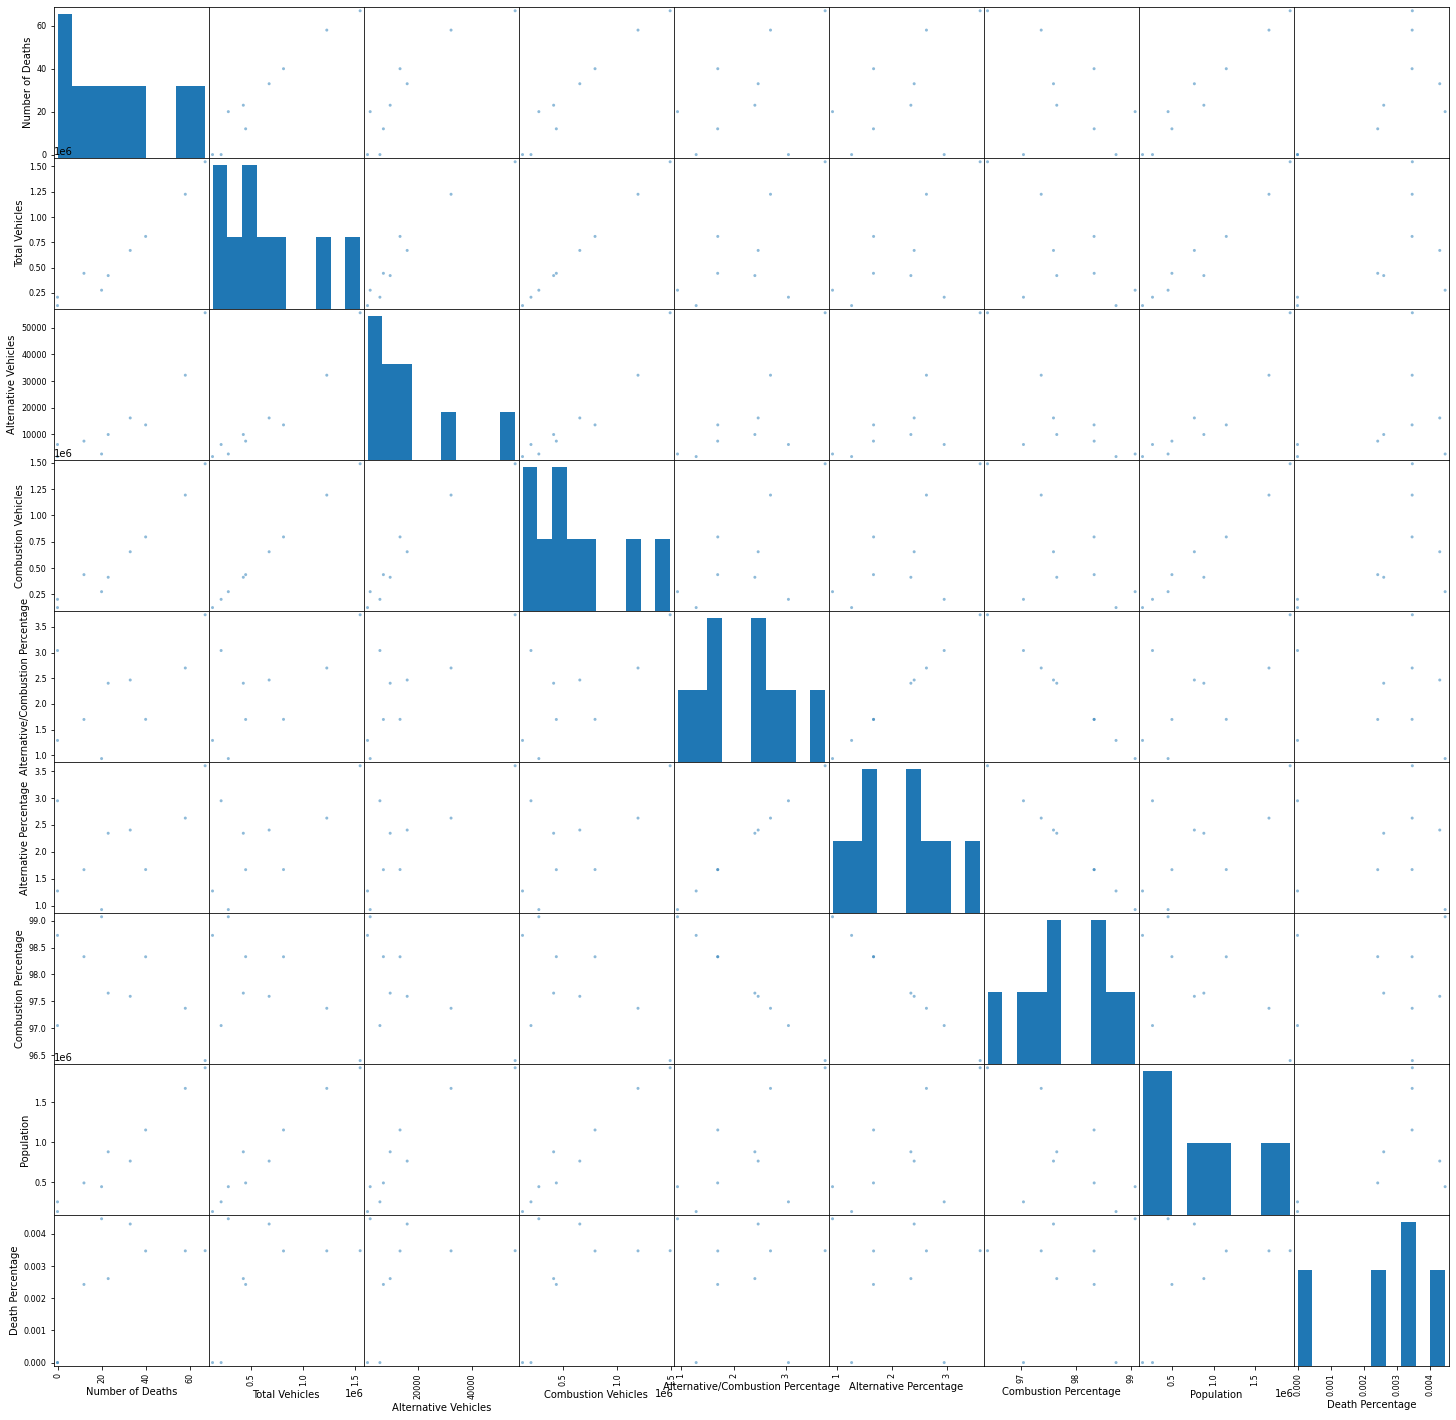

In [15]:
def pair_wise_plots(df):
  axes = pd.plotting.scatter_matrix(df, figsize=(25,25))

pair_wise_plots(Test)

In [16]:
def Number_Set(df):
  drop = ['Counties']
  return df[df.columns.difference(drop)]

NumberSet = Number_Set(Test)
print(NumberSet.head(5))

   Alternative Percentage  Alternative Vehicles  \
0                2.628125                 32201   
1                1.670484                 13508   
2                2.346177                  9892   
3                2.405671                 16123   
4                3.600969                 55678   

   Alternative/Combustion Percentage  Combustion Percentage  \
0                           2.699060              97.371875   
1                           1.698863              98.329516   
2                           2.402545              97.653823   
3                           2.464970              97.594329   
4                           3.735482              96.399031   

   Combustion Vehicles  Death Percentage  Number of Deaths  Population  \
0              1193045          0.003470                58     1671329   
1               795120          0.003468                40     1153526   
2               411730          0.002609                23      881549   
3               65

In [17]:
def convert_to_points(df):
  p = []
  for c in df.columns:
    pc = df[c]
    p.append(pc)
  points = np.stack(p,axis=1)
  return points

points = convert_to_points(NumberSet)
print(NumberSet.head(5))
print(points)

   Alternative Percentage  Alternative Vehicles  \
0                2.628125                 32201   
1                1.670484                 13508   
2                2.346177                  9892   
3                2.405671                 16123   
4                3.600969                 55678   

   Alternative/Combustion Percentage  Combustion Percentage  \
0                           2.699060              97.371875   
1                           1.698863              98.329516   
2                           2.402545              97.653823   
3                           2.464970              97.594329   
4                           3.735482              96.399031   

   Combustion Vehicles  Death Percentage  Number of Deaths  Population  \
0              1193045          0.003470                58     1671329   
1               795120          0.003468                40     1153526   
2               411730          0.002609                23      881549   
3               65

In [18]:
from sklearn.cluster import KMeans

def cluster_points(points,K=3):
  km = KMeans(n_clusters = K, max_iter = 300, n_init=100,init = 'random', random_state = None, tol = 0.0001)
  km.fit(points)
  centers = km.cluster_centers_
  print(centers)
  labels = km.predict(points)
  return km,labels

km,labels = cluster_points(points)
print(labels)
print(len(km.cluster_centers_),set(labels))

[[2.14077743e+00 1.31743333e+04 2.18879286e+00 9.78592226e+01
  6.20311667e+05 3.46051548e-03 3.20000000e+01 9.33882667e+05
  6.33486000e+05]
 [1.70424427e+00 4.42725000e+03 1.74000010e+00 9.82957557e+01
  2.59246000e+05 1.72383618e-03 8.00000000e+00 3.34644750e+05
  2.63673250e+05]
 [3.11454706e+00 4.39395000e+04 3.21727118e+00 9.68854529e+01
  1.34178100e+06 3.47283136e-03 6.25000000e+01 1.79959050e+06
  1.38572050e+06]]
[2 0 0 0 2 1 1 1 1]
3 {0, 1, 2}


551298325169.9922


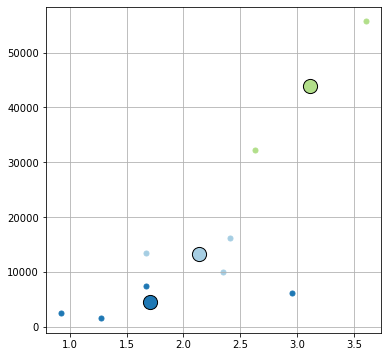

In [19]:
import matplotlib.cm as cm

def plot_kmeans(points,centers,labels,x0=0,x1=1,columns=None):
  K = len(centers)
  colors= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
  cmap = matplotlib.colors.ListedColormap(colors)
  if len(colors) <= K:
    cmap = cm.Dark2
  fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
  for c_id in range(0,K):
    mask = labels == c_id 
    c = cmap(c_id)
    axes.scatter(points[mask][:,x0],points[mask][:,x1],color=c,s=25)
    axes.scatter(centers[c_id,x0],centers[c_id,x1],color = c,s=200,edgecolor='black')

  if columns is not None:
      axes.set_xlabel(columns[x0], fontsize=18)
      axes.set_ylabel(columns[x1], fontsize=16)
  axes.grid()

plot_kmeans(points,km.cluster_centers_,labels)
print(km.inertia_)


# Conclusion

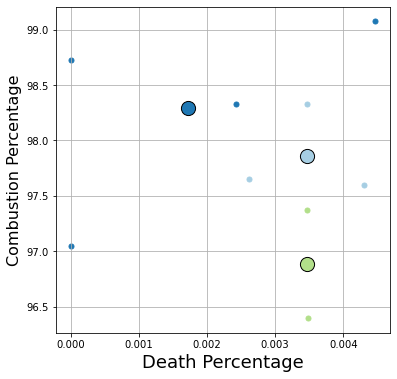

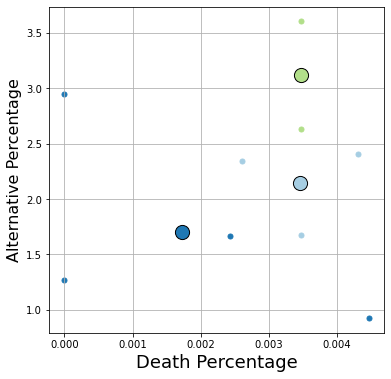

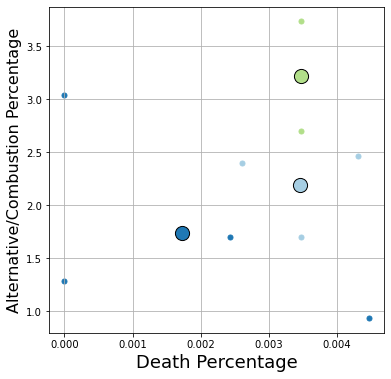

In [20]:
attributes = NumberSet.columns.tolist()
x0 = attributes.index('Death Percentage')
x1 = attributes.index('Combustion Percentage')
plot_kmeans(points,km.cluster_centers_,labels,x0,x1,attributes)

attributes = NumberSet.columns.tolist()
x0 = attributes.index('Death Percentage')
x1 = attributes.index('Alternative Percentage')
plot_kmeans(points,km.cluster_centers_,labels,x0,x1,attributes)

attributes = NumberSet.columns.tolist()
x0 = attributes.index('Death Percentage')
x1 = attributes.index('Alternative/Combustion Percentage')
plot_kmeans(points,km.cluster_centers_,labels,x0,x1,attributes) 

In [21]:
def plot_scores(scores, y="inertia score"):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(scores[:, 0], scores[:, 1], color='blue', marker='x')
    axes.set_ylabel(y, fontsize=18)
    axes.set_xlabel('K', fontsize=18)

[[2.63319265e+00 3.37956667e+04 2.71113514e+00 9.73668073e+01
  1.15956067e+06 3.47109718e-03 5.50000000e+01 1.58423567e+06
  1.19335633e+06]
 [1.92813759e+00 7.28733333e+03 1.97125265e+00 9.80718624e+01
  3.50466500e+05 2.30154373e-03 1.46666667e+01 4.97783500e+05
  3.57753833e+05]]
[[1.70424427e+00 4.42725000e+03 1.74000010e+00 9.82957557e+01
  2.59246000e+05 1.72383618e-03 8.00000000e+00 3.34644750e+05
  2.63673250e+05]
 [3.11454706e+00 4.39395000e+04 3.21727118e+00 9.68854529e+01
  1.34178100e+06 3.47283136e-03 6.25000000e+01 1.79959050e+06
  1.38572050e+06]
 [2.14077743e+00 1.31743333e+04 2.18879286e+00 9.78592226e+01
  6.20311667e+05 3.46051548e-03 3.20000000e+01 9.33882667e+05
  6.33486000e+05]]
[[3.11454706e+00 4.39395000e+04 3.21727118e+00 9.68854529e+01
  1.34178100e+06 3.47283136e-03 6.25000000e+01 1.79959050e+06
  1.38572050e+06]
 [1.67048383e+00 1.35080000e+04 1.69886306e+00 9.83295162e+01
  7.95120000e+05 3.46762882e-03 4.00000000e+01 1.15352600e+06
  8.08628000e+05]
 [2.

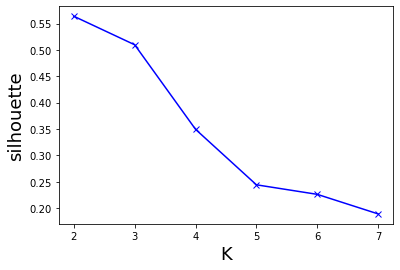

In [22]:
from sklearn.metrics import silhouette_score

def get_silhouette_scores(points):
  scores = []
  for k in range(2, 8):
     km, labels = cluster_points(points, K=k)
     s_score = silhouette_score(points,  km.labels_)
     scores.append((k, s_score))
  return np.array(scores)

# be sure to comment this call out, before testing
# it will cause a timeout during any submissions
sscores = get_silhouette_scores(points)
plot_scores(sscores, y='silhouette')

[[2.63319265e+00 3.37956667e+04 2.71113514e+00 9.73668073e+01
  1.15956067e+06 3.47109718e-03 5.50000000e+01 1.58423567e+06
  1.19335633e+06]
 [1.92813759e+00 7.28733333e+03 1.97125265e+00 9.80718624e+01
  3.50466500e+05 2.30154373e-03 1.46666667e+01 4.97783500e+05
  3.57753833e+05]]
[[3.11454706e+00 4.39395000e+04 3.21727118e+00 9.68854529e+01
  1.34178100e+06 3.47283136e-03 6.25000000e+01 1.79959050e+06
  1.38572050e+06]
 [2.14077743e+00 1.31743333e+04 2.18879286e+00 9.78592226e+01
  6.20311667e+05 3.46051548e-03 3.20000000e+01 9.33882667e+05
  6.33486000e+05]
 [1.70424427e+00 4.42725000e+03 1.74000010e+00 9.82957557e+01
  2.59246000e+05 1.72383618e-03 8.00000000e+00 3.34644750e+05
  2.63673250e+05]]
[[1.71613597e+00 3.43266667e+03 1.75437252e+00 9.82838640e+01
  2.00080667e+05 1.48928201e-03 6.66666667e+00 2.81414333e+05
  2.03513333e+05]
 [2.14013921e+00 1.11420000e+04 2.18813278e+00 9.78598608e+01
  5.00852333e+05 3.11380544e-03 2.26666667e+01 7.14152667e+05
  5.11994333e+05]
 [3.

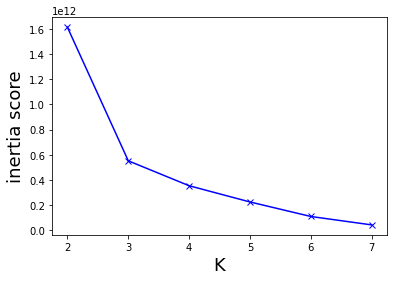

In [23]:
def get_inertias(points):
  scores = []
  for k in range(2, 8):
     km, labels = cluster_points(points, K=k)
     scores.append((k, km.inertia_))
  return np.array(scores)
  
# be sure to comment this call out, before testing
# it will cause a timeout during any submissions
inertia_scores = get_inertias(points)
plot_scores(inertia_scores)

In [24]:
def get_metadata():
  meta = {
          "title": PROJECT_TITLE, # keep this as is
          "nb_id": NOTEBOOK_ID,   # keep this as is
          "data" : ['https://drive.google.com/uc?export=download&id=1Gq2g5FqSx7_-S6v6p_F12IVnqxCwb6lu','https://drive.google.com/uc?export=download&id=1YFslPN7VAvn5KVTmO53b4hsDhOd1QZC4'],

          # permissions
          # do you give the instructor the permission to copy this project
          # and allow others to view it in the class gallery?
          "allow_gallery": True,
          
          # if your project is made viewable to others,
          # do you want to include your name (first/last)?
          "allow_name_release": True
          }
  return meta

1. For this project I am still debating whether to use the K-means algorithim of logistic regression to detail how zipcodes and asthma correlate to each other in the Bay Area. I am also beginning to take a cyberGIS class and if I feel comfortable I may make a map of the final data I come across. 


2. In order to prepare the data I am going to have to do a heavy amount of text normalization from the datasets I chose. I have a list of counties and the asthma deaths in them. From my vehicle dataset I have zipcodes and will have to research what zip codes make up the counties in the bay area. Next I will have to create a dictionary for the cleaned zip codes and tie them into each of the counties. This may involve adding a new column to the dataframe. The other important data column is the vehicle type and I will get a count of each present based in the counties. By the end my dataset will be cleaned to have the number of vehicle types and deaths in a county. From here I am thinking of doing a K-means visualiztion like the homework to see clusters of counties that should have more compared with count values. 

The considerations I have made to distinguish fuel types are as following:

Combustion: Gasoline, Diesel + Diesel Hybrid, Hybrid Gasoline, Flex Fuel, Natural Gas, Other

Alternative: Hydrogen Fuel Cell, Battery Electric, Plug-in Hybrid

Specific instructions will come for what to submit for the various milestones.

If necessary, you can download the Python version of this notebook by using the `File->Download .py` as well as the notebook itself `File->Download .ipynb`.

